In [19]:
import os
import pandas as pd

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
directory = r'C:\Users\lubna\OneDrive\Documents\OASIS\car'

In [21]:
files_in_car_directory = os.listdir(directory)

In [22]:
print(files_in_car_directory)

['car.csv']


In [23]:
if 'car.csv' in files_in_car_directory:
    file_path = os.path.join(directory, 'car.csv')
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
else:
    print('The file "car.csv" is not present in the directory. Please check the file name and extension.')

Dataset loaded successfully.


In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [26]:
print(data.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [28]:
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [29]:
print(data.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [33]:
print(data['Car_Name'].unique())
print(data['Fuel_Type'].unique())
print(data['Selling_type'].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [34]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
data['Selling_type'] = data['Selling_type'].map({'Dealer': 0, 'Individual': 1})
data['Transmission'] = data['Transmission'].map({'Manual': 0, 'Automatic': 1})

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [37]:
model = RandomForestRegressor(random_state=42)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label_encoder = LabelEncoder()

In [41]:
data['Car_Name'] = label_encoder.fit_transform(data['Car_Name'])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = data.drop('Selling_Price', axis=1) 
y = data['Selling_Price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
y_pred = model.predict(X_test)

In [47]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [48]:
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Root Mean Squared Error (RMSE): 0.8858862105444391
R-squared (R2): 0.9659312149278643


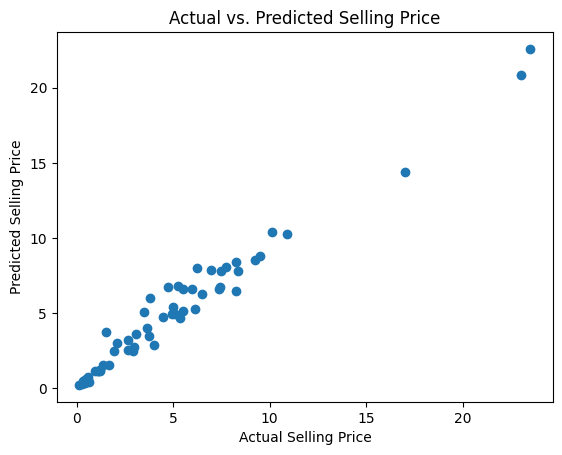

In [49]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price")
plt.show()

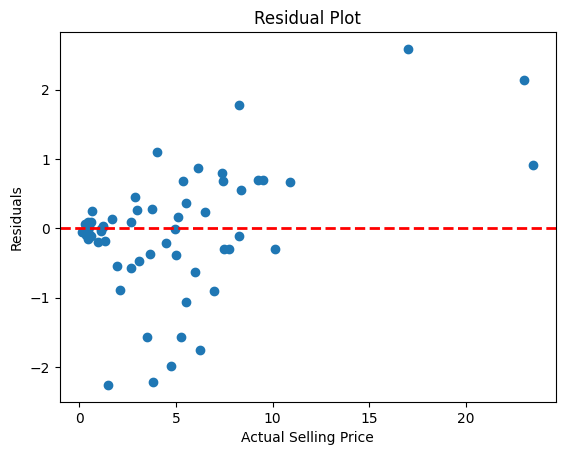

In [55]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Selling Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

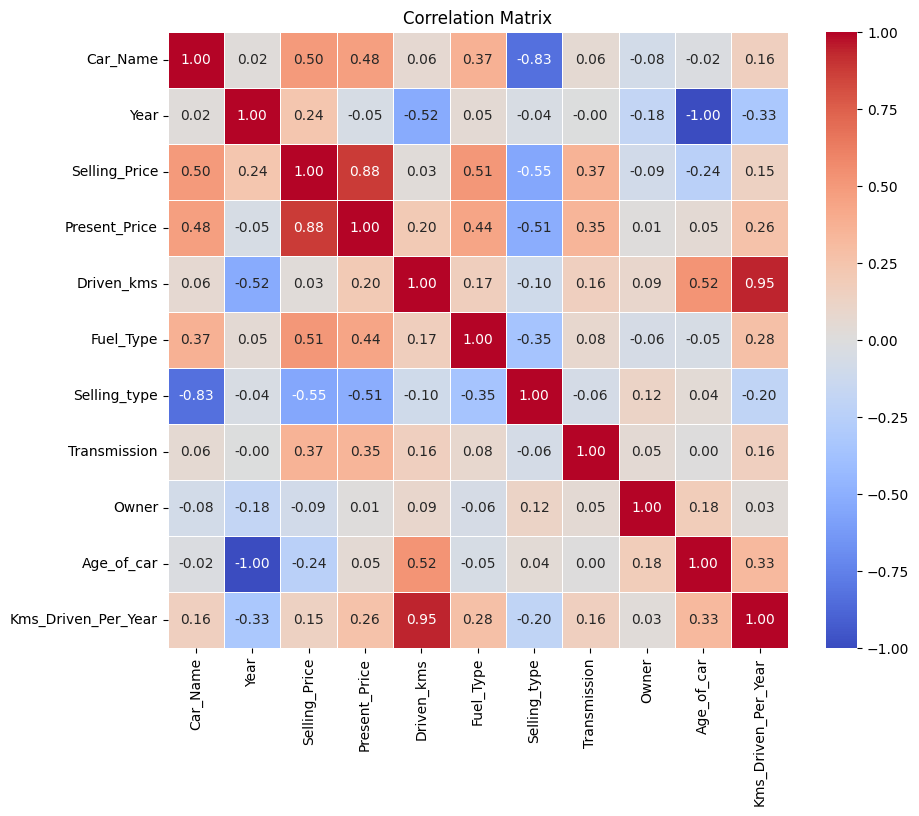

In [58]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

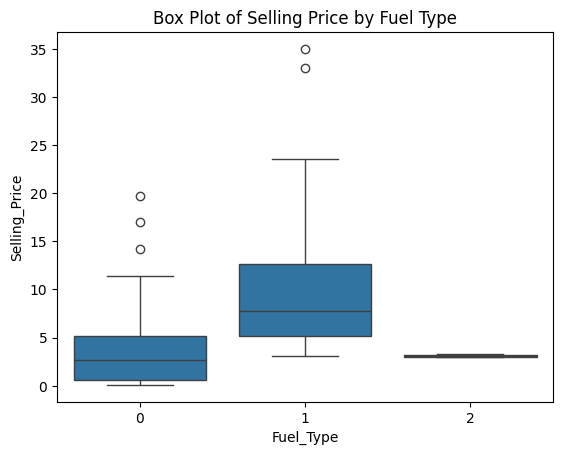

In [59]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Box Plot of Selling Price by Fuel Type')
plt.show()